In [411]:
%load_ext autoreload
%autoreload 2

import os
import sys
import pandas as pd
import numpy as np

import warnings
from optimize_debug import optimize
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


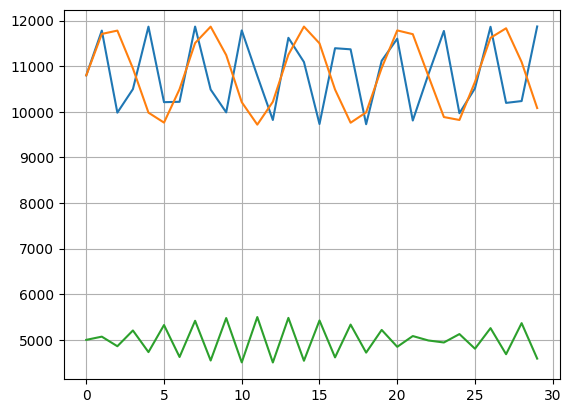

In [414]:
T = 30
time = np.arange(0, T, 1)


solar = 1080*(np.sin(2*time) + 10)
wind = 1080*(np.sin(time) + 10)
battery = 500*(np.sin(3*time) + 10)


plt.plot(solar)
plt.plot(wind)
plt.plot(battery)

renewable_powers = pd.DataFrame()
renewable_powers["solar"] = solar
renewable_powers["wind"] = wind
renewable_powers["battery"] = battery

plt.grid()




In [413]:
model = optimize(
    T, renewable_powers, battery_storage_hours=2, stack_life_hrs=80000, cost_year=2025
)



epsilon 0.0


## Wind results

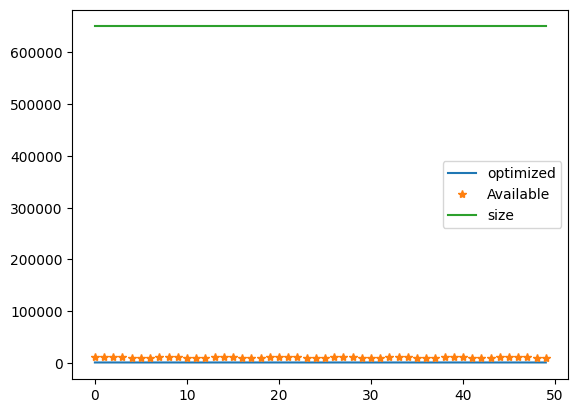

In [402]:
wind_opt = [model.used_wind_power_mw[t].value for t in range(T)]
plt.plot(wind_opt, label = 'optimized')
plt.plot(wind, '*', label = 'Available')
plt.plot(np.ones(T,)*model.wind_size_mw[0].value, label = 'size')
plt.legend()


## Solar results:


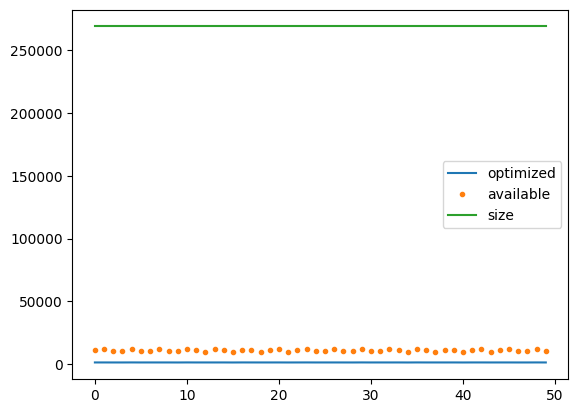

In [403]:
solar_opt = [model.used_solar_power_mw[t].value for t in range(T)]
plt.plot(solar_opt, label = 'optimized')
plt.plot(solar, '.', label = 'available')
plt.plot(np.ones(T,)*model.solar_size_mw[0].value, label = 'size')
plt.legend()

## Battery results

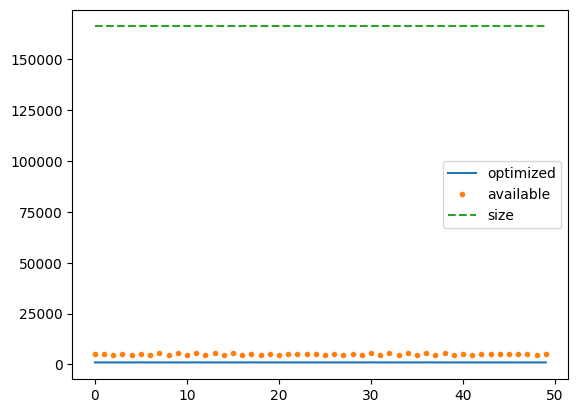

In [404]:
battery_opt = [model.used_battery_power_mw[t].value for t in range(T)]
plt.plot(battery_opt, label = 'optimized')
plt.plot(battery, '.', label = 'available')
plt.plot(np.ones(T,)*model.battery_size_mw[0].value, '--', label = 'size')
plt.legend()

# Jen always left the door open at NREL. Recruited me back after I 


